In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_10 = pd.read_csv("10mins_data.csv")

In [4]:
df_10.set_index('date', inplace=True)

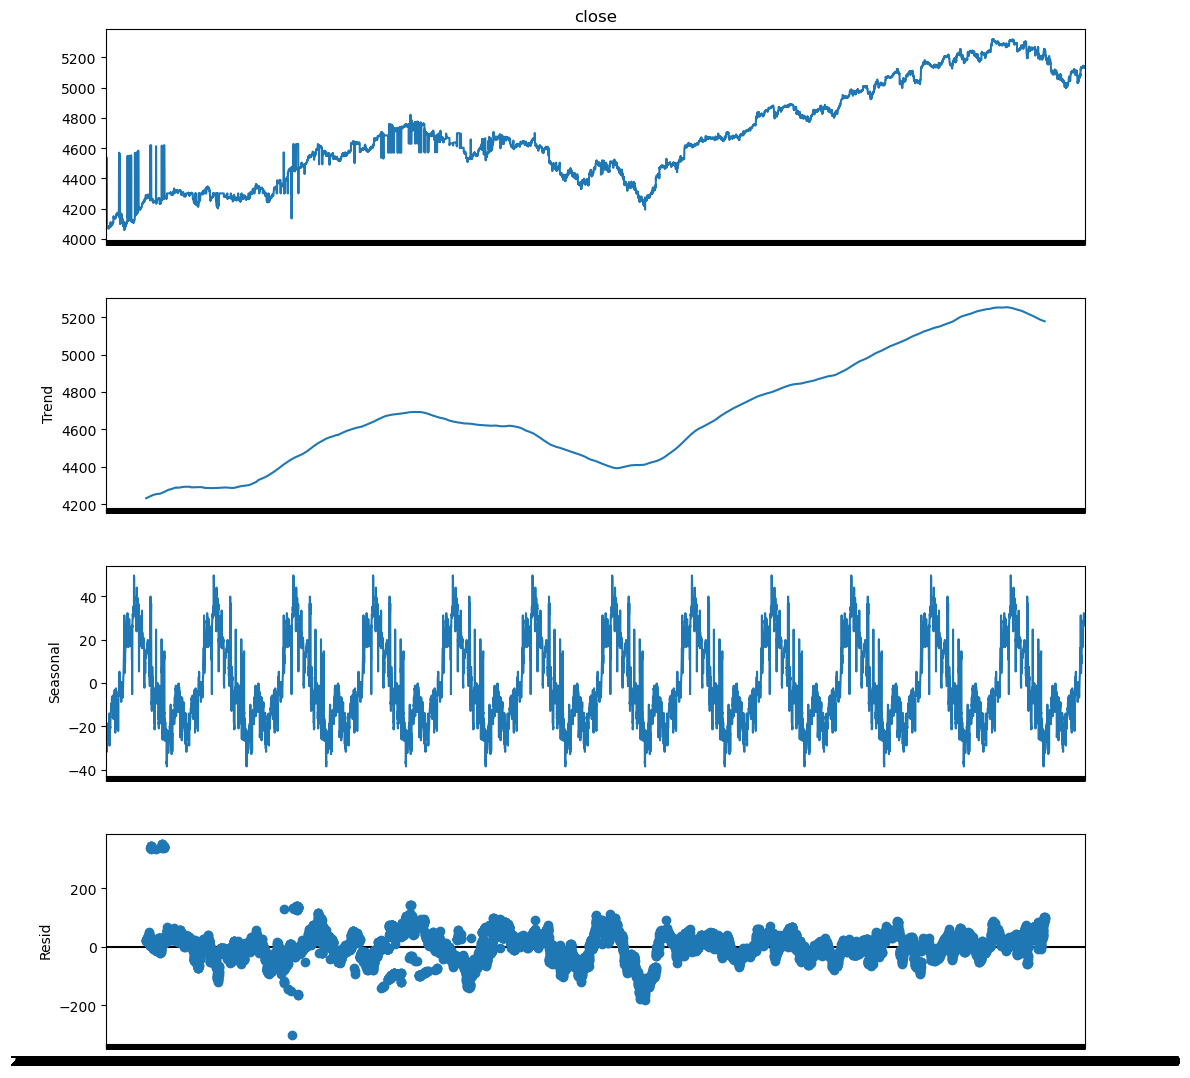

Standard Deviation of Residuals: 48.18


In [9]:
# Perform seasonal decomposition
result = seasonal_decompose(df_10['close'], model='additive', period=144*7)  # Assuming hourly data and a daily seasonality of 24 hours

# Plot the decomposed components
fig = result.plot()
fig.set_size_inches(15, 12)
plt.show()

residual_std = result.resid.std()
print(f"Standard Deviation of Residuals: {residual_std:.2f}")

In [16]:
df_10.shape

(12373, 7)

In [10]:
residual_std = result.resid.std()
print(f"Standard Deviation of Residuals: {residual_std:.2f}")

Standard Deviation of Residuals: 48.18


In [11]:
df_60 = pd.read_csv("60mins_data.csv")

In [13]:
df_60.set_index('Datetime', inplace=True)

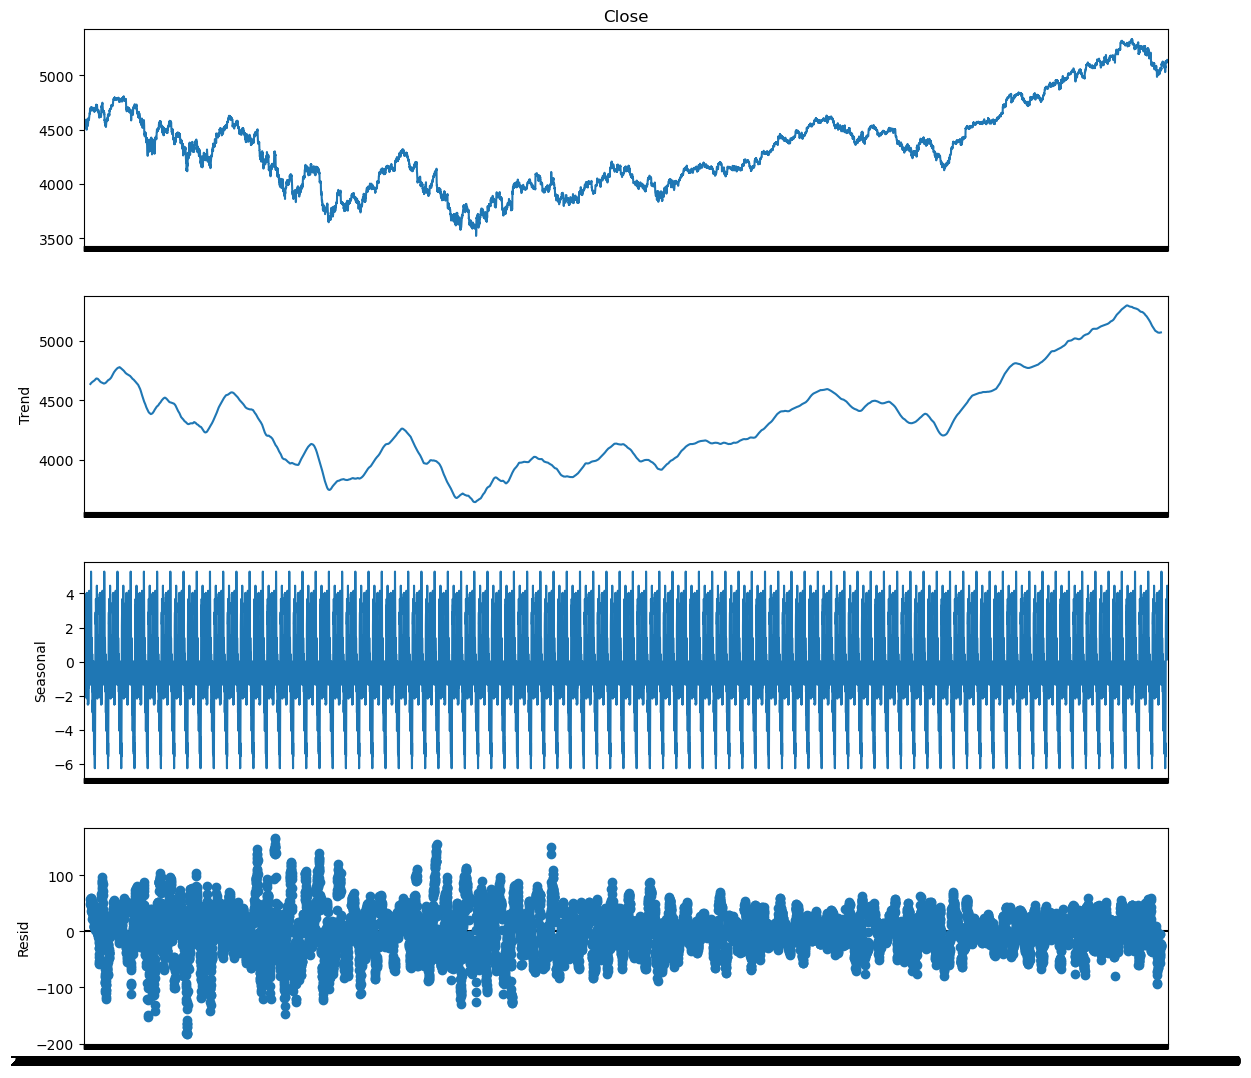

Standard Deviation of Residuals: 38.33


In [14]:
# Perform seasonal decomposition
result = seasonal_decompose(df_60['Close'], model='additive', period=24*7)  # Assuming hourly data and a daily seasonality of 24 hours

# Plot the decomposed components
fig = result.plot()
fig.set_size_inches(15, 12)
plt.show()

residual_std = result.resid.std()
print(f"Standard Deviation of Residuals: {residual_std:.2f}")

In [15]:
residual_std = result.resid.std()
print(f"Standard Deviation of Residuals: {residual_std:.2f}")

Standard Deviation of Residuals: 38.33


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import ast
# Load your DataFrame here
df = pd.read_csv('60mins_data.csv')
pd.options.mode.chained_assignment = None

In [18]:
df.set_index('Datetime', inplace = True)
df.index = pd.to_datetime(df.index)
df['date'] = df.index.date

def rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    RS = gain / loss
    return 100 - (100 / (1 + RS))
df['RSI'] = rsi(df['Close'])
df

,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,date,RSI
Datetime,,,,,,,,,,
2021-12-02 00:00:00,4534.50,4539.00,4531.50,4537.50,4537.50,0,False,False,2021-12-02,NaN
2021-12-02 01:00:00,4537.50,4549.00,4533.00,4547.75,4547.75,13314,False,False,2021-12-02,NaN
2021-12-02 02:00:00,4547.50,4552.00,4531.50,4536.50,4536.50,25623,False,False,2021-12-02,NaN
2021-12-02 03:00:00,4536.50,4540.75,4524.50,4536.50,4536.50,34609,False,False,2021-12-02,NaN
2021-12-02 04:00:00,4536.25,4549.75,4533.75,4542.75,4542.75,24214,False,False,2021-12-02,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-04-26 12:00:00,5134.00,5143.25,5129.25,5143.25,5143.25,98685,False,True,2024-04-26,72.020725
2024-04-26 13:00:00,5143.25,5146.50,5138.50,5141.75,5141.75,104327,False,True,2024-04-26,68.421053
2024-04-26 14:00:00,5141.75,5142.50,5133.25,5141.50,5141.50,94654,False,True,2024-04-26,68.421053


In [65]:
news_df = pd.read_csv("news_data.csv")
news_df

,title,url,time_published,authors,summary,banner_image,source,category_within_source,source_domain,topics,overall_sentiment_score,overall_sentiment_label,ticker_sentiment,date
0,"Apple, AMC, Meta, And How Elon Musk Is Reactin...",https://www.benzinga.com/news/large-cap/22/12/...,20221231T190310,['Michael Cohen'],Benzinga examined the prospects for many inves...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Trading,www.benzinga.com,"[{'topic': 'Financial Markets', 'relevance_sco...",-0.079733,Neutral,"[{'ticker': 'MSTR', 'relevance_score': '0.2478...",20221231.0
1,Bulls In A Bear Market: These 10 Stocks Clocke...,https://www.benzinga.com/analyst-ratings/analy...,20221231T161114,['Shanthi Rexaline'],2022 would go down as one of the worst years f...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,General,www.benzinga.com,"[{'topic': 'Life Sciences', 'relevance_score':...",0.064077,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.1137...",20221231.0
2,Where Will Unity Software Stock Be in 3 Years?,https://www.fool.com/investing/2022/12/31/wher...,20221231T154500,['Leo Sun'],The game-engine developer still has a lot to p...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'IPO', 'relevance_score': '0.769861...",0.202065,Somewhat-Bullish,"[{'ticker': 'U', 'relevance_score': '0.095517'...",20221231.0
3,3 Unstoppable Growth Stocks to Buy After a Sto...,https://www.fool.com/investing/2022/12/31/3-un...,20221231T140000,['Dani Cook'],These companies have grown by triple-digit per...,https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.152163,Somewhat-Bullish,"[{'ticker': 'AMD', 'relevance_score': '0.22324...",20221231.0
4,"Even in an Advertising Slowdown, These 3 Stock...",https://www.fool.com/investing/2022/12/31/even...,20221231T120000,['Adam Levy'],"Ad sales growth will slow in 2023, but these s...",https://g.foolcdn.com/image/?url=https%3A%2F%2...,Motley Fool,NaN,www.fool.com,"[{'topic': 'Earnings', 'relevance_score': '0.9...",0.151938,Somewhat-Bullish,"[{'ticker': 'GOOG', 'relevance_score': '0.2433...",20221231.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35361,Dow Jones Surges 550 Points On Strong Jobs Dat...,https://www.investors.com/dow-jones-soars-400-...,20230602T160200,"['KEN SHREVE' ""Investor's Business Daily""]",Dow Jones Surges 550 Points On Strong Jobs Dat...,https://www.investors.com/wp-content/uploads/2...,Investors Business Daily,NaN,www.investors.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.337131,Somewhat-Bullish,"[{'ticker': 'CELH', 'relevance_score': '0.1053...",20230602.0
35362,Job Fair: Will Strong Hiring Numbers Hit The P...,https://www.benzinga.com/markets/23/06/3269347...,20230602T160133,['Alex Coffey'],( Friday market open ) The debt ceiling fight ...,https://cdn.benzinga.com/files/images/story/20...,Benzinga,Markets,www.benzinga.com,"[{'topic': 'Technology', 'relevance_score': '0...",-0.007278,Neutral,"[{'ticker': 'AAPL', 'relevance_score': '0.0397...",20230602.0
35363,"Market Ramp Up On Debt Deal, Fed Pause Hopes: ...",https://www.investors.com/news/stock-market-ra...,20230602T155900,"['IBD STAFF' ""Investor's Business Daily""]",Stock Market Rally Revs Higher As Congress OKs...,https://www.investors.com/wp-content/uploads/2...,Investors Business Daily,NaN,www.investors.com,"[{'topic': 'Life Sciences', 'relevance_score':...",0.012138,Neutral,"[{'ticker': 'XPEV', 'relevance_score': '0.0650...",20230602.0
35364,"Boosted by Quarterly Beat and AI's Breakout, B...",https://realmoney.thestreet.com/investing/stoc...,20230602T155641,['Stephen Guilfoyle'],The adjustments made were made primarily for t...,https://s.thestreet.com/files/tsc/v2008/photos...,The Street,GoogleRSS,realmoney.thestreet.com,"[{'topic': 'Financial Markets', 'relevance_sco...",0.176601,Somewhat-Bullish,"[{'ticker': 'BAC', 'relevance_score': '0.04663...",20230602.0


In [66]:
news_df = news_df.dropna(subset='date')

In [67]:
news_df['date'] = news_df['date'].astype(int)
news_df['date'] = pd.to_datetime(news_df['date'].astype(str), format='%Y%m%d', errors ='coerce')

In [68]:
import ast
def insert_commas(string):
    # Insert a comma between '}' and '{'
    corrected_string = string.replace('}\n {', '},\n {')
    return corrected_string
def parse_string(row):
    try:
        # Insert commas to correct the syntax
        corrected_row = insert_commas(row)
        # Convert the string representation of list-dict into actual list-dict
        row_parsed = ast.literal_eval(corrected_row)
        return row_parsed
    except Exception as e:
        print(f"Error parsing row: {row} - {e}")
        return None

news_df['parsed_topics'] = news_df['topics'].apply(parse_string)

In [69]:
news_df['parsed_topics']

0        [{'topic': 'Financial Markets', 'relevance_sco...
1        [{'topic': 'Life Sciences', 'relevance_score':...
2        [{'topic': 'IPO', 'relevance_score': '0.769861...
3        [{'topic': 'Financial Markets', 'relevance_sco...
4        [{'topic': 'Earnings', 'relevance_score': '0.9...
                               ...                        
35361    [{'topic': 'Financial Markets', 'relevance_sco...
35362    [{'topic': 'Technology', 'relevance_score': '0...
35363    [{'topic': 'Life Sciences', 'relevance_score':...
35364    [{'topic': 'Financial Markets', 'relevance_sco...
35365    [{'topic': 'Financial Markets', 'relevance_sco...
Name: parsed_topics, Length: 35364, dtype: object

In [70]:
topics = ['Technology', 'Financial Markets', 'Manufacturing', 'Earnings', 'Finance', 'Retail & Wholesale', 'Economy - Monetary', 'Life Sciences', 'Energy & Transportation', 'Real Estate & Construction', 'Blockchain', 'IPO', 'Mergers & Acquisitions', 'Economy - Fiscal', 'Economy - Macro']

# Initialize columns for each topic with NaNs
for topic in topics:
    news_df[topic] = np.nan

# Populate the topic columns with relevance scores
for index, row in news_df.iterrows():
    if row['parsed_topics'] is not None:
        for item in row['parsed_topics']:
            topic = item['topic']
            relevance_score = float(item['relevance_score'])  # Convert string to float if necessary
            if topic in news_df.columns:
                news_df.at[index, topic] = relevance_score

In [71]:
news_df[topics] = news_df[topics].fillna(0)
news_df['date'] = news_df['date'].dt.date

In [72]:
# Aggregate the features by day
agg_funcs = {
    'overall_sentiment_score': 'mean',  # Average sentiment score
    'Technology': 'mean',  # Mean of topic mentions or relevance scores
    'Financial Markets': 'mean',
    'Manufacturing': 'mean',
    'Earnings': 'mean',
    'Finance': 'mean',
    'Retail & Wholesale': 'mean',
    'Economy - Monetary': 'mean',
    'Life Sciences': 'mean',
    'Energy & Transportation': 'mean',
    'Real Estate & Construction': 'mean',
    'Blockchain': 'mean',
    'IPO': 'mean',
    'Mergers & Acquisitions': 'mean',
    'Economy - Fiscal': 'mean',
    'Economy - Macro': 'mean'
}
news_agg = news_df.groupby('date').agg(agg_funcs).reset_index()
news_agg

,date,overall_sentiment_score,Technology,Financial Markets,Manufacturing,Earnings,Finance,Retail & Wholesale,Economy - Monetary,Life Sciences,Energy & Transportation,Real Estate & Construction,Blockchain,IPO,Mergers & Acquisitions,Economy - Fiscal,Economy - Macro
0,2022-04-01,-0.443871,0.000000,0.538269,0.500000,0.000000,0.500000,0.000000,0.158519,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2022-04-02,0.105966,0.308333,0.799226,0.308333,0.742070,0.000000,0.183333,0.000000,0.100000,0.100000,0.000000,0.000000,0.000000,0.039630,0.000000,0.000000
2,2022-04-03,-0.007349,0.306667,0.556884,0.506667,0.735543,0.000000,0.106667,0.031704,0.040000,0.040000,0.000000,0.251796,0.000000,0.000000,0.000000,0.000000
3,2022-04-04,0.050411,0.212281,0.558556,0.512281,0.529424,0.100000,0.057018,0.025029,0.047368,0.060526,0.010526,0.023763,0.016360,0.034679,0.000000,0.000000
4,2022-04-05,-0.056378,0.129252,0.422408,0.545918,0.249378,0.123299,0.069728,0.161584,0.010204,0.087585,0.034014,0.079501,0.022203,0.019050,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2024-04-25,0.171262,0.582219,0.468079,0.210691,0.376314,0.079762,0.073004,0.068562,0.027358,0.014965,0.012000,0.010802,0.011956,0.013101,0.002540,0.002540
610,2024-04-26,0.178154,0.540699,0.444263,0.244797,0.418581,0.069442,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
611,2024-04-27,0.160431,0.522481,0.430485,0.247610,0.342694,0.077067,0.072545,0.016349,0.035207,0.030233,0.014858,0.008482,0.016273,0.004915,0.000000,0.000000
612,2024-04-28,0.154736,0.529885,0.346793,0.257718,0.329023,0.099261,0.066831,0.071810,0.020854,0.006979,0.018473,0.017723,0.010154,0.002876,0.006217,0.001562


In [73]:
df['date'] = df.index
df['date'] = df['date'].dt.date

In [74]:
dff = df.merge(news_agg, on='date', how='left')
dff

,Open,High,Low,Close,Adj Close,Volume,Random,Chronological,date,RSI,...,Retail & Wholesale,Economy - Monetary,Life Sciences,Energy & Transportation,Real Estate & Construction,Blockchain,IPO,Mergers & Acquisitions,Economy - Fiscal,Economy - Macro
0,4534.50,4539.00,4531.50,4537.50,4537.50,0,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4537.50,4549.00,4533.00,4547.75,4547.75,13314,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4547.50,4552.00,4531.50,4536.50,4536.50,25623,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4536.50,4540.75,4524.50,4536.50,4536.50,34609,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4536.25,4549.75,4533.75,4542.75,4542.75,24214,False,False,2021-12-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13773,5134.00,5143.25,5129.25,5143.25,5143.25,98685,False,True,2024-04-26,72.020725,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
13774,5143.25,5146.50,5138.50,5141.75,5141.75,104327,False,True,2024-04-26,68.421053,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
13775,5141.75,5142.50,5133.25,5141.50,5141.50,94654,False,True,2024-04-26,68.421053,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819
13776,5141.25,5144.00,5128.75,5129.50,5129.50,181727,True,True,2024-04-26,51.785714,...,0.070343,0.088163,0.037529,0.026218,0.010972,0.013159,0.017971,0.004863,0.013142,0.001819


In [75]:
dff.isnull().sum()

Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
Random                           0
Chronological                    0
date                             0
RSI                             13
overall_sentiment_score       3629
Technology                    3629
Financial Markets             3629
Manufacturing                 3629
Earnings                      3629
Finance                       3629
Retail & Wholesale            3629
Economy - Monetary            3629
Life Sciences                 3629
Energy & Transportation       3629
Real Estate & Construction    3629
Blockchain                    3629
IPO                           3629
Mergers & Acquisitions        3629
Economy - Fiscal              3629
Economy - Macro               3629
dtype: int64

In [87]:
features = ['overall_sentiment_score', 'Technology', 'Financial Markets', 'Manufacturing', 'Earnings', 'Finance', 'Retail & Wholesale', 'Economy - Monetary', 'Life Sciences', 'Energy & Transportation', 'Real Estate & Construction', 'Blockchain', 'IPO', 'Mergers & Acquisitions', 'Economy - Fiscal', 'Economy - Macro']

In [77]:
dff[features] = dff[features].fillna(0)

In [88]:
# Selecting the 'Close' column and features for correlation
correlation_matrix = dff[['Close'] + features].corr()

# Select only the 'Close' column correlations with the features
close_correlations = correlation_matrix[['Close']].drop(index='Close')

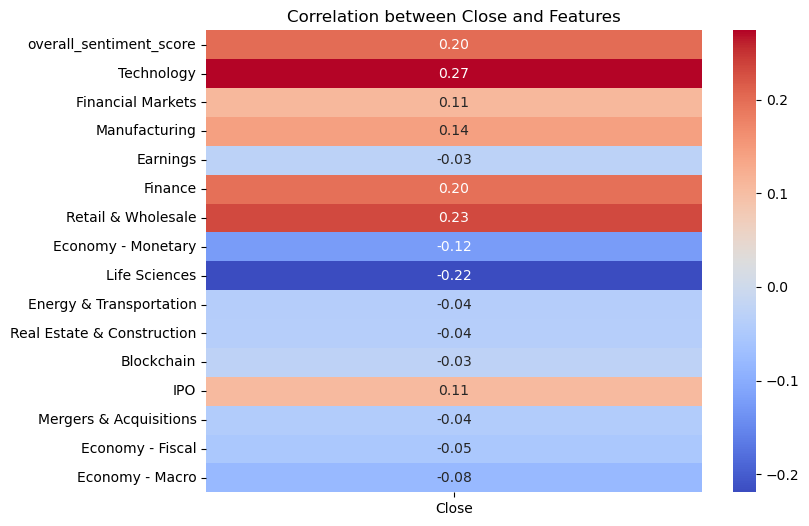

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(close_correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Close and Features')
plt.show()

In [95]:
dff.index = df.index
dff.to_csv("60_min_news_combined.csv")